In [1]:
import pandas as pd 
%matplotlib inline

In [4]:
census= pd.read_csv('acs2015_county_data.csv')

In [5]:
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [7]:
census.dtypes

CensusId             int64
State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Citizen              int64
Income             float64
IncomeErr          float64
IncomePerCap         int64
IncomePerCapErr      int64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
d

In [6]:
census.State.value_counts()

Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Puerto Rico              78
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Alabama                  67
Florida                  67
Pennsylvania             67
South Dakota             66
Louisiana                64
Colorado                 64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico          

In [9]:
census.isnull().sum(axis=1).value_counts()

0    3218
1       1
2       1
dtype: int64

In [20]:
census_missing=census.dropna()

In [11]:
census_columns=[col for col in census.columns.values if col not in ['State','County','CensusId']]

In [12]:
from sklearn.cluster import KMeans #(unsupervised learning split data in clusters using the means)

In [13]:
kmeans= KMeans(n_clusters=4)

In [14]:
census_clusters=kmeans.fit(census_missing[census_columns])

In [16]:
census_clusters.cluster_centers_ #(scikit-learn works ith arrays)

array([[4.86137678e+04, 2.40621967e+04, 2.45515711e+04, 1.05567434e+01,
        7.64794408e+01, 8.35263158e+00, 1.80161184e+00, 9.32302632e-01,
        6.60197368e-02, 3.59949480e+04, 4.52585901e+04, 2.96736349e+03,
        2.35332332e+04, 1.41598651e+03, 1.76663816e+01, 2.44105263e+01,
        3.05263158e+01, 1.83702632e+01, 2.20742434e+01, 1.29949671e+01,
        1.60345066e+01, 7.94196711e+01, 1.03449342e+01, 6.61085526e-01,
        3.34588816e+00, 1.59351974e+00, 4.63578947e+00, 2.30830263e+01,
        2.15065523e+04, 7.38485197e+01, 1.77832895e+01, 8.07098684e+00,
        2.97006579e-01, 8.08003289e+00],
       [2.59497053e+06, 1.27467168e+06, 1.32029884e+06, 3.28736842e+01,
        3.98684211e+01, 1.44368421e+01, 3.31578947e-01, 9.75789474e+00,
        1.89473684e-01, 1.65020984e+06, 5.85898947e+04, 4.97473684e+02,
        3.08353158e+04, 2.48105263e+02, 1.68368421e+01, 2.35842105e+01,
        3.71842105e+01, 1.95105263e+01, 2.45473684e+01, 8.02631579e+00,
        1.07368421e+01,

In [21]:
census_missing['cluster']=census_clusters.fit_predict(census_missing[census_columns])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
census_missing.cluster.value_counts() # 1 is an outlier

0    3045
3     153
1      19
2       1
Name: cluster, dtype: int64

In [25]:
census_missing[census_missing.cluster==0].State.value_counts()

Texas             241
Georgia           155
Virginia          130
Kentucky          119
Missouri          113
Kansas            103
Iowa               98
Illinois           97
North Carolina     97
Tennessee          92
Nebraska           92
Indiana            90
Minnesota          84
Mississippi        82
Ohio               82
Michigan           78
Puerto Rico        78
Oklahoma           75
Arkansas           74
Wisconsin          69
South Dakota       66
Alabama            65
Louisiana          62
Colorado           59
Pennsylvania       58
Montana            56
West Virginia      55
Florida            53
North Dakota       53
New York           51
South Carolina     44
Idaho              43
California         37
Washington         34
Oregon             33
New Mexico         32
Alaska             29
Utah               27
Wyoming            23
Maryland           19
Maine              16
Nevada             15
Vermont            14
Arizona            13
New Jersey         10
New Hampsh

In [28]:
census_missing[census_missing.cluster==1].State.value_counts()

California    5
Texas         4
New York      3
Florida       2
Michigan      1
Arizona       1
Illinois      1
Washington    1
Nevada        1
Name: State, dtype: int64

In [29]:
census_missing[census_missing.cluster==2].State.value_counts()

California    1
Name: State, dtype: int64

In [33]:
census_missing[census_missing.cluster==3].State.value_counts()

California              15
Florida                 12
New Jersey              11
Pennsylvania             9
Massachusetts            8
Texas                    8
New York                 8
Ohio                     6
Colorado                 5
Maryland                 5
Michigan                 4
Illinois                 4
Georgia                  4
Washington               4
Tennessee                3
North Carolina           3
Wisconsin                3
Oregon                   3
Connecticut              3
Virginia                 3
Minnesota                3
Missouri                 2
Alabama                  2
Louisiana                2
Kansas                   2
Utah                     2
South Carolina           2
Oklahoma                 2
Indiana                  2
Rhode Island             1
Delaware                 1
Iowa                     1
Arkansas                 1
New Mexico               1
Nevada                   1
Idaho                    1
Nebraska                 1
D

In [30]:
census_missing.groupby(['cluster'])['Income'].mean()

cluster
0    45264.092282
1    58589.894737
2    56196.000000
3    61615.901961
Name: Income, dtype: float64

In [34]:
census_missing.groupby(['cluster'])['ChildPoverty'].mean()

cluster
0    24.418030
1    23.584211
2    25.800000
3    19.681046
Name: ChildPoverty, dtype: float64

In [ ]:
#hierarchical clustering: divisive/agglomerative

In [41]:
from sklearn.cluster import AgglomerativeClustering

census_sample= census_missing[census_columns].sample(n=100) # perform it on a sample just for demonstration, we can do it on the whole data
hier_clust=AgglomerativeClustering(linkage='ward')
census_hier=hier_clust.fit(census_sample)


In [39]:
census_hier.children_

array([[ 50,  81],
       [ 17,  33],
       [  2,  58],
       [ 64,  75],
       [ 74,  85],
       [  1,  59],
       [ 60,  63],
       [ 42,  44],
       [ 41,  84],
       [ 36,  70],
       [ 32,  96],
       [ 38,  65],
       [  5,  79],
       [ 39,  73],
       [ 35,  69],
       [ 21,  76],
       [ 27,  68],
       [ 45,  72],
       [ 14,  77],
       [  4, 107],
       [ 22,  40],
       [ 15,  24],
       [ 71, 112],
       [ 19, 113],
       [  0, 108],
       [ 80,  97],
       [102, 110],
       [  9, 120],
       [ 47,  53],
       [ 18,  92],
       [ 62,  66],
       [ 89, 122],
       [  6,  90],
       [ 25,  28],
       [ 23, 121],
       [ 43,  56],
       [ 86,  98],
       [100, 119],
       [ 31, 104],
       [ 48,  55],
       [105, 124],
       [117, 118],
       [  7,  26],
       [ 34,  61],
       [109, 116],
       [101, 132],
       [123, 130],
       [ 83, 106],
       [115, 138],
       [ 87,  88],
       [ 12,  82],
       [ 30,  95],
       [126,

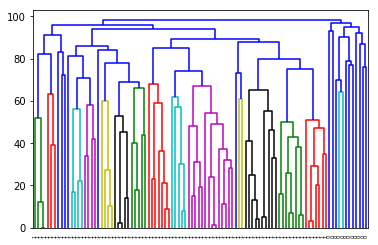

In [48]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np

def plot_dendrogram(model, **kwargs):
        children=model.children_
        distance=np.arange(children.shape[0])
        no_observations=np.arange(2,children.shape[0]+2)
        linkage_matrix= np.column_stack([children,distance,no_observations]).astype(float)
        dendrogram(linkage_matrix, **kwargs)
plot_dendrogram(census_hier,labels=census_hier.labels_)